In [36]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [38]:
#confusion matrix
def plot_confusion_matrix(y, y_predict):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show()

In [39]:
from js import fetch
import io

#load dataset
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713
Test accuracy: 0.8333333333333334


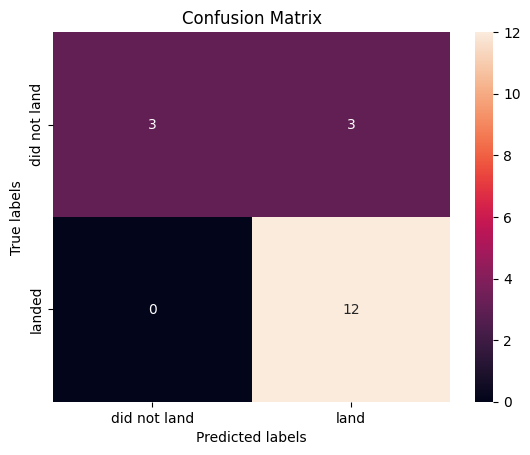

In [40]:
#target var y
Y = data['Class'].to_numpy()

#standardize var x
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

#train/test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

#logistic regression and GridSearchCV
parameters = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

print("tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

#logistic regression test accuracy
yhat = logreg_cv.predict(X_test)
print("Test accuracy:", logreg_cv.score(X_test, Y_test))
plot_confusion_matrix(Y_test, yhat)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856
Test accuracy: 0.8333333333333334


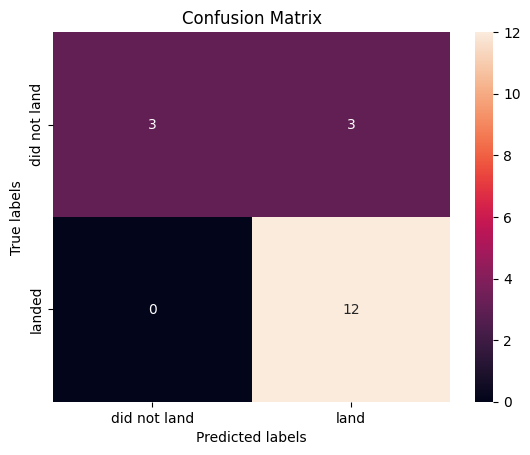

In [41]:
#svm and GridSearchCV
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

print("tuned hyperparameters :(best parameters) ", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)

#svm test accuracy
yhat = svm_cv.predict(X_test)
print("Test accuracy:", svm_cv.score(X_test, Y_test))
plot_confusion_matrix(Y_test, yhat)

tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.875
Test accuracy: 0.8333333333333334


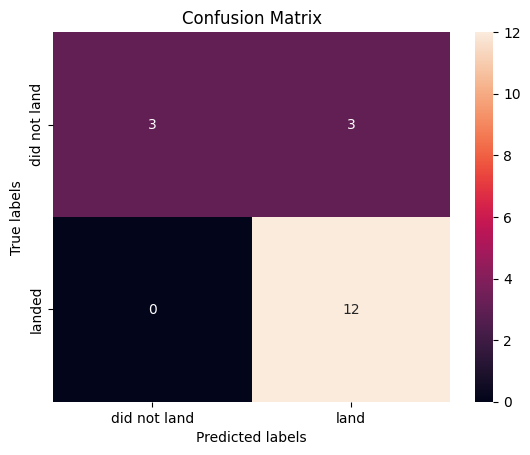

In [42]:
#decission tree and GridSearchCV
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

print("tuned hyperparameters :(best parameters) ", tree_cv.best_params_)
print("accuracy :", tree_cv.best_score_)

#decission tree test accuracy
yhat = tree_cv.predict(X_test)
print("Test accuracy:", tree_cv.score(X_test, Y_test))
plot_confusion_matrix(Y_test, yhat)

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858
Test accuracy: 0.8333333333333334


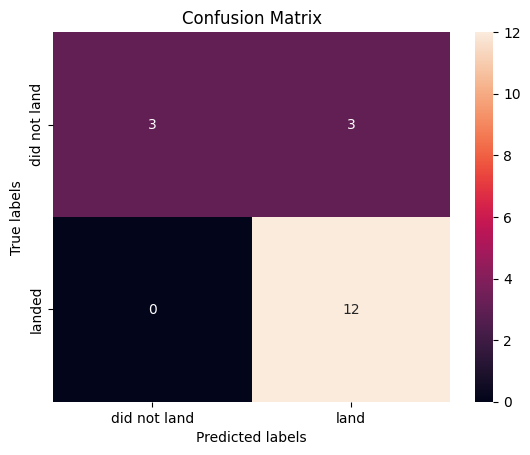

Missing features: set()
Extra features: set()


In [53]:
#KNN and GridSearchCV
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

print("tuned hyperparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)

#KNN Test Accuracy
yhat = knn_cv.predict(X_test)
print("Test accuracy:", knn_cv.score(X_test, Y_test))
plot_confusion_matrix(Y_test, yhat)


Final Model Comparison on Test Set:
Logistic Regression: 0.8333333333333334
SVM: 0.8333333333333334
Decision Tree: 0.8333333333333334
KNN: 0.8333333333333334


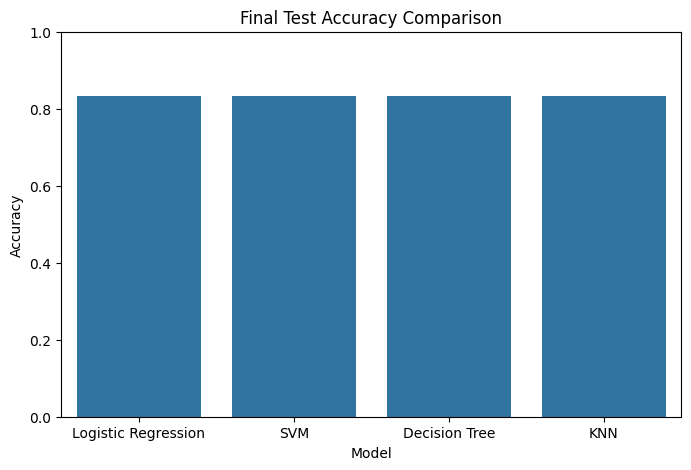

In [44]:
#comparission with bar chart
print("\nFinal Model Comparison on Test Set:")
acc_lr = logreg_cv.score(X_test, Y_test)
acc_svm = svm_cv.score(X_test, Y_test)
acc_tree = tree_cv.score(X_test, Y_test)
acc_knn = knn_cv.score(X_test, Y_test)

print("Logistic Regression:", acc_lr)
print("SVM:", acc_svm)
print("Decision Tree:", acc_tree)
print("KNN:", acc_knn)

models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
scores = [acc_lr, acc_svm, acc_tree, acc_knn]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=scores)
plt.ylim(0, 1)
plt.title('Final Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()